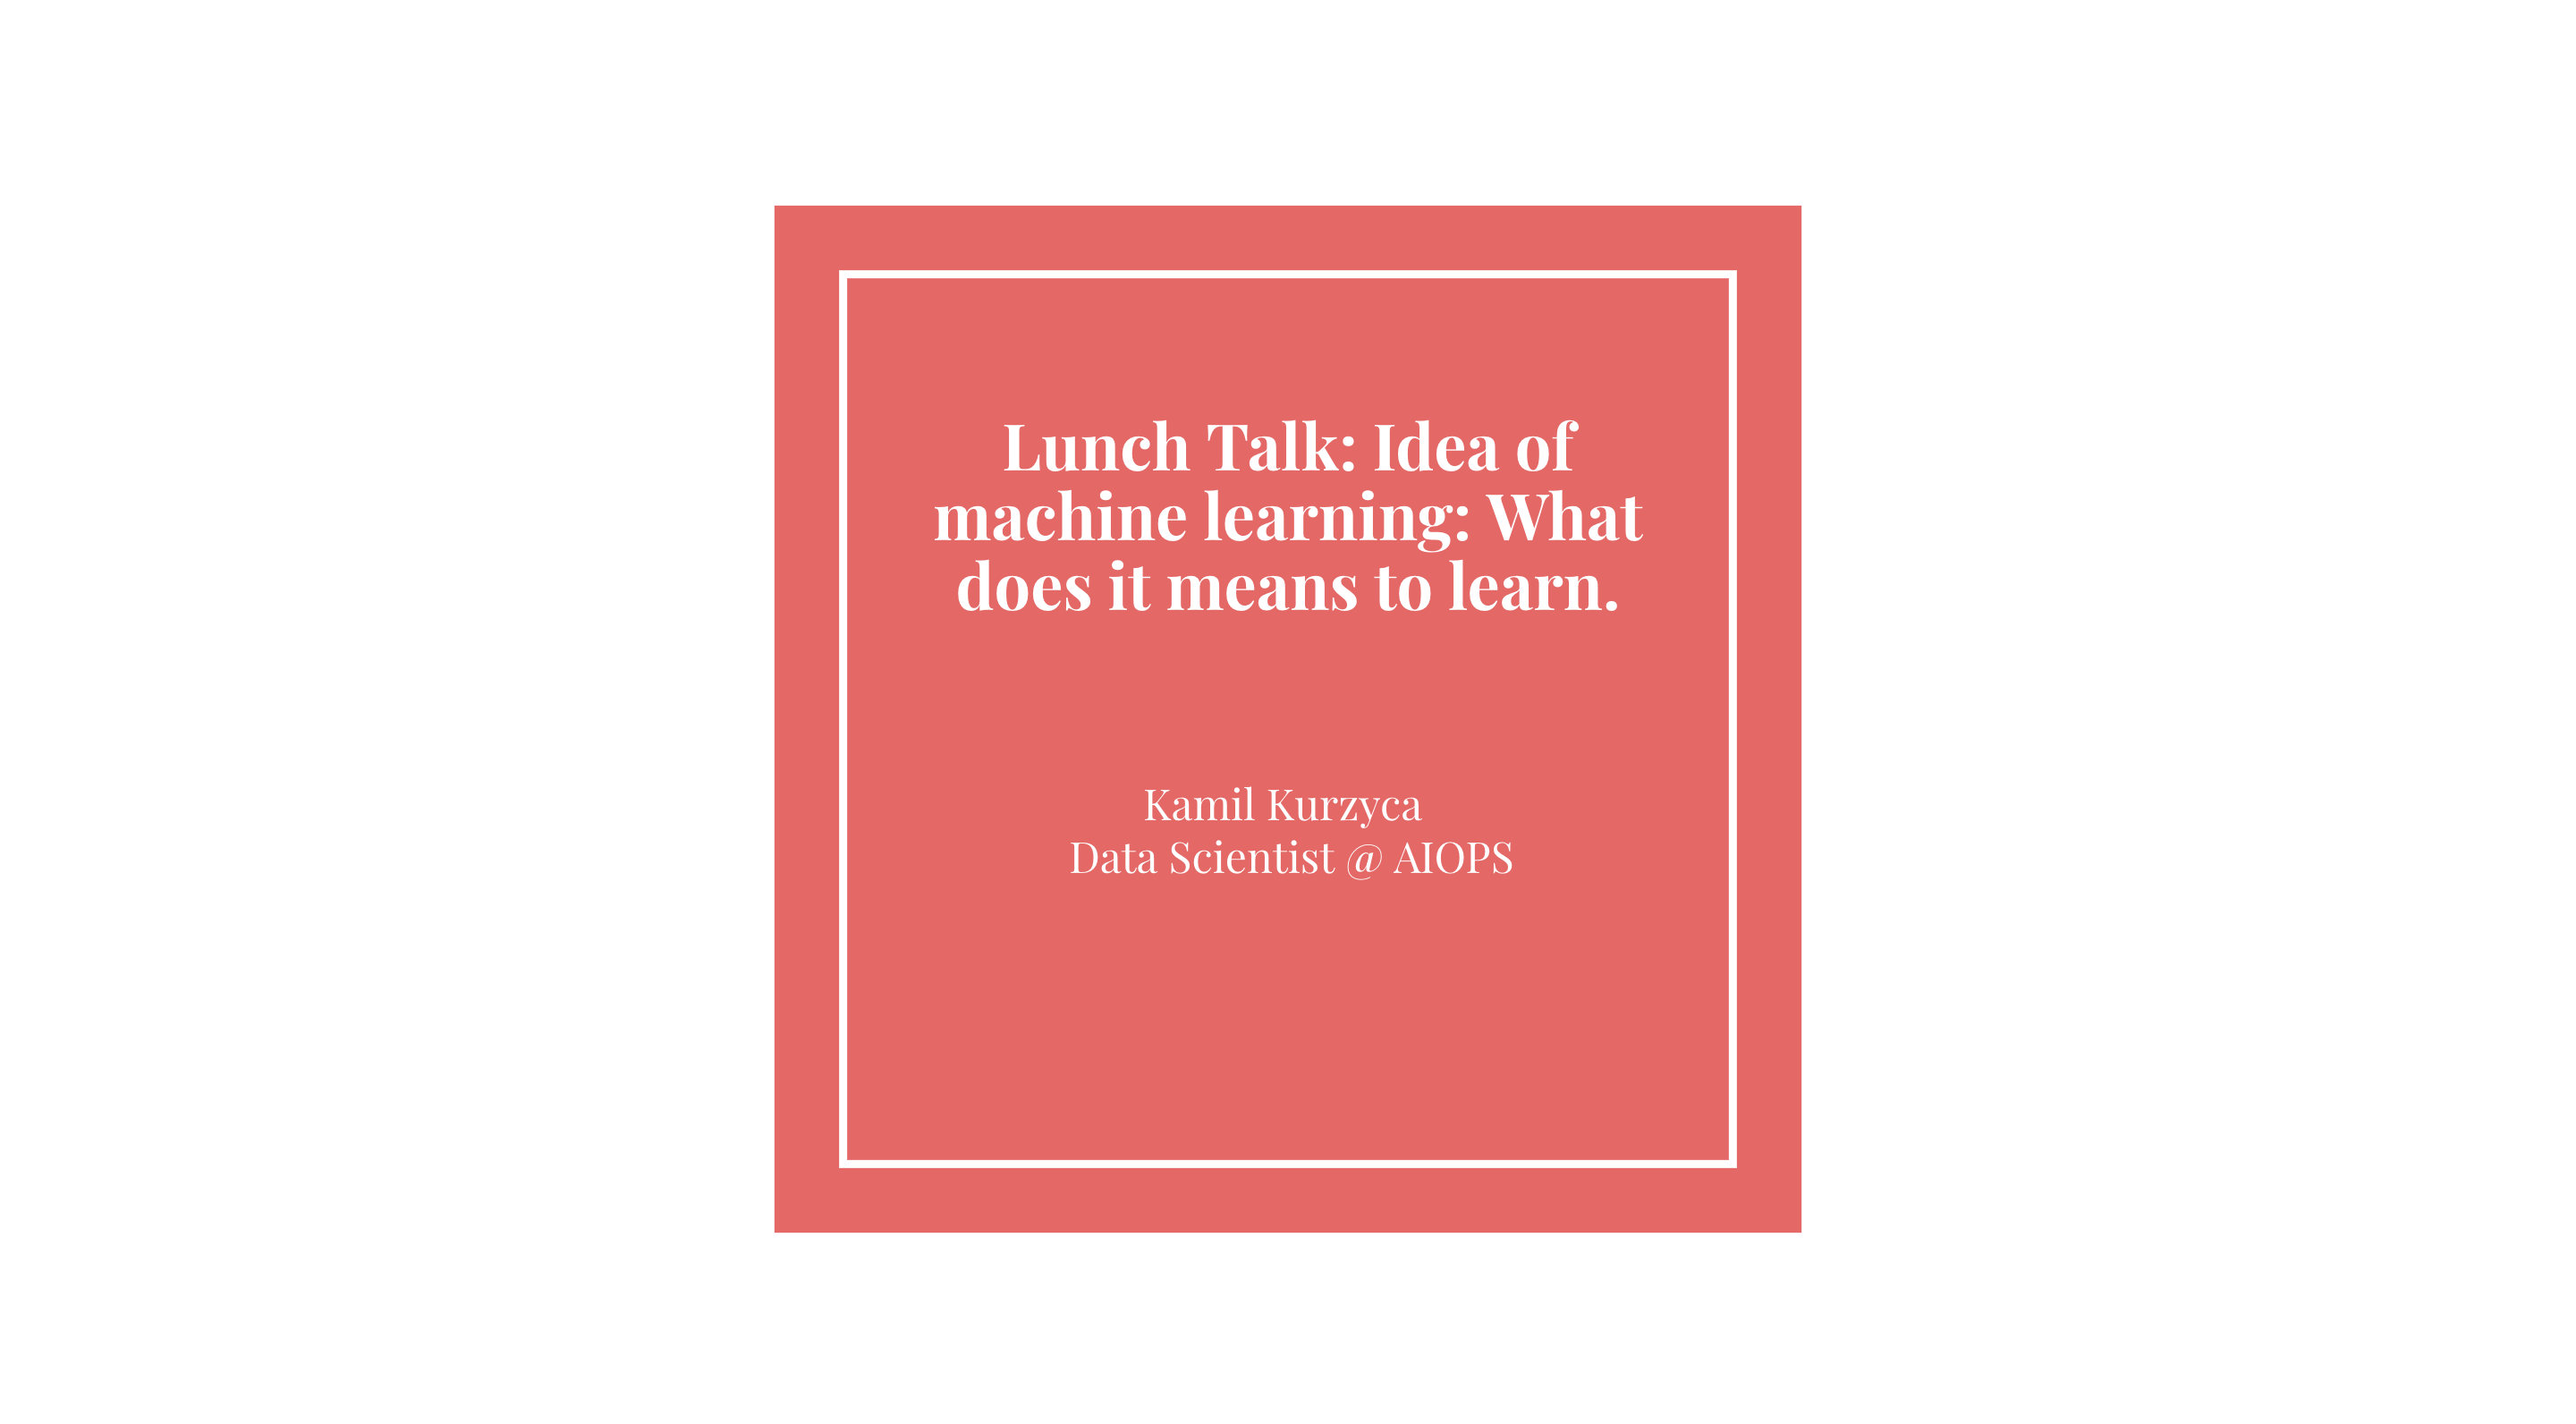

# O czym będzie ?


# Uczenie przez powtarzanie wzorca.
##  Przykład regresji: Regresja liniowa
## Przykład klasyfikacji: Regresja logistyczna
# Uczenie przez rozróżnienie wzorców.
## Przykład analizy skupień: K-means
# Uczenie przez oddziaływanie ze środowiskiem.
## Prosty przykład dla uczenia ze wzmocnieniem: Q-learning

![tlt](ecosys.png)

![tlt](mini.jpg)

## Hands on experience- Uczenie przez powtarzanie dostępnego wzorca. 

## Przykład regresji

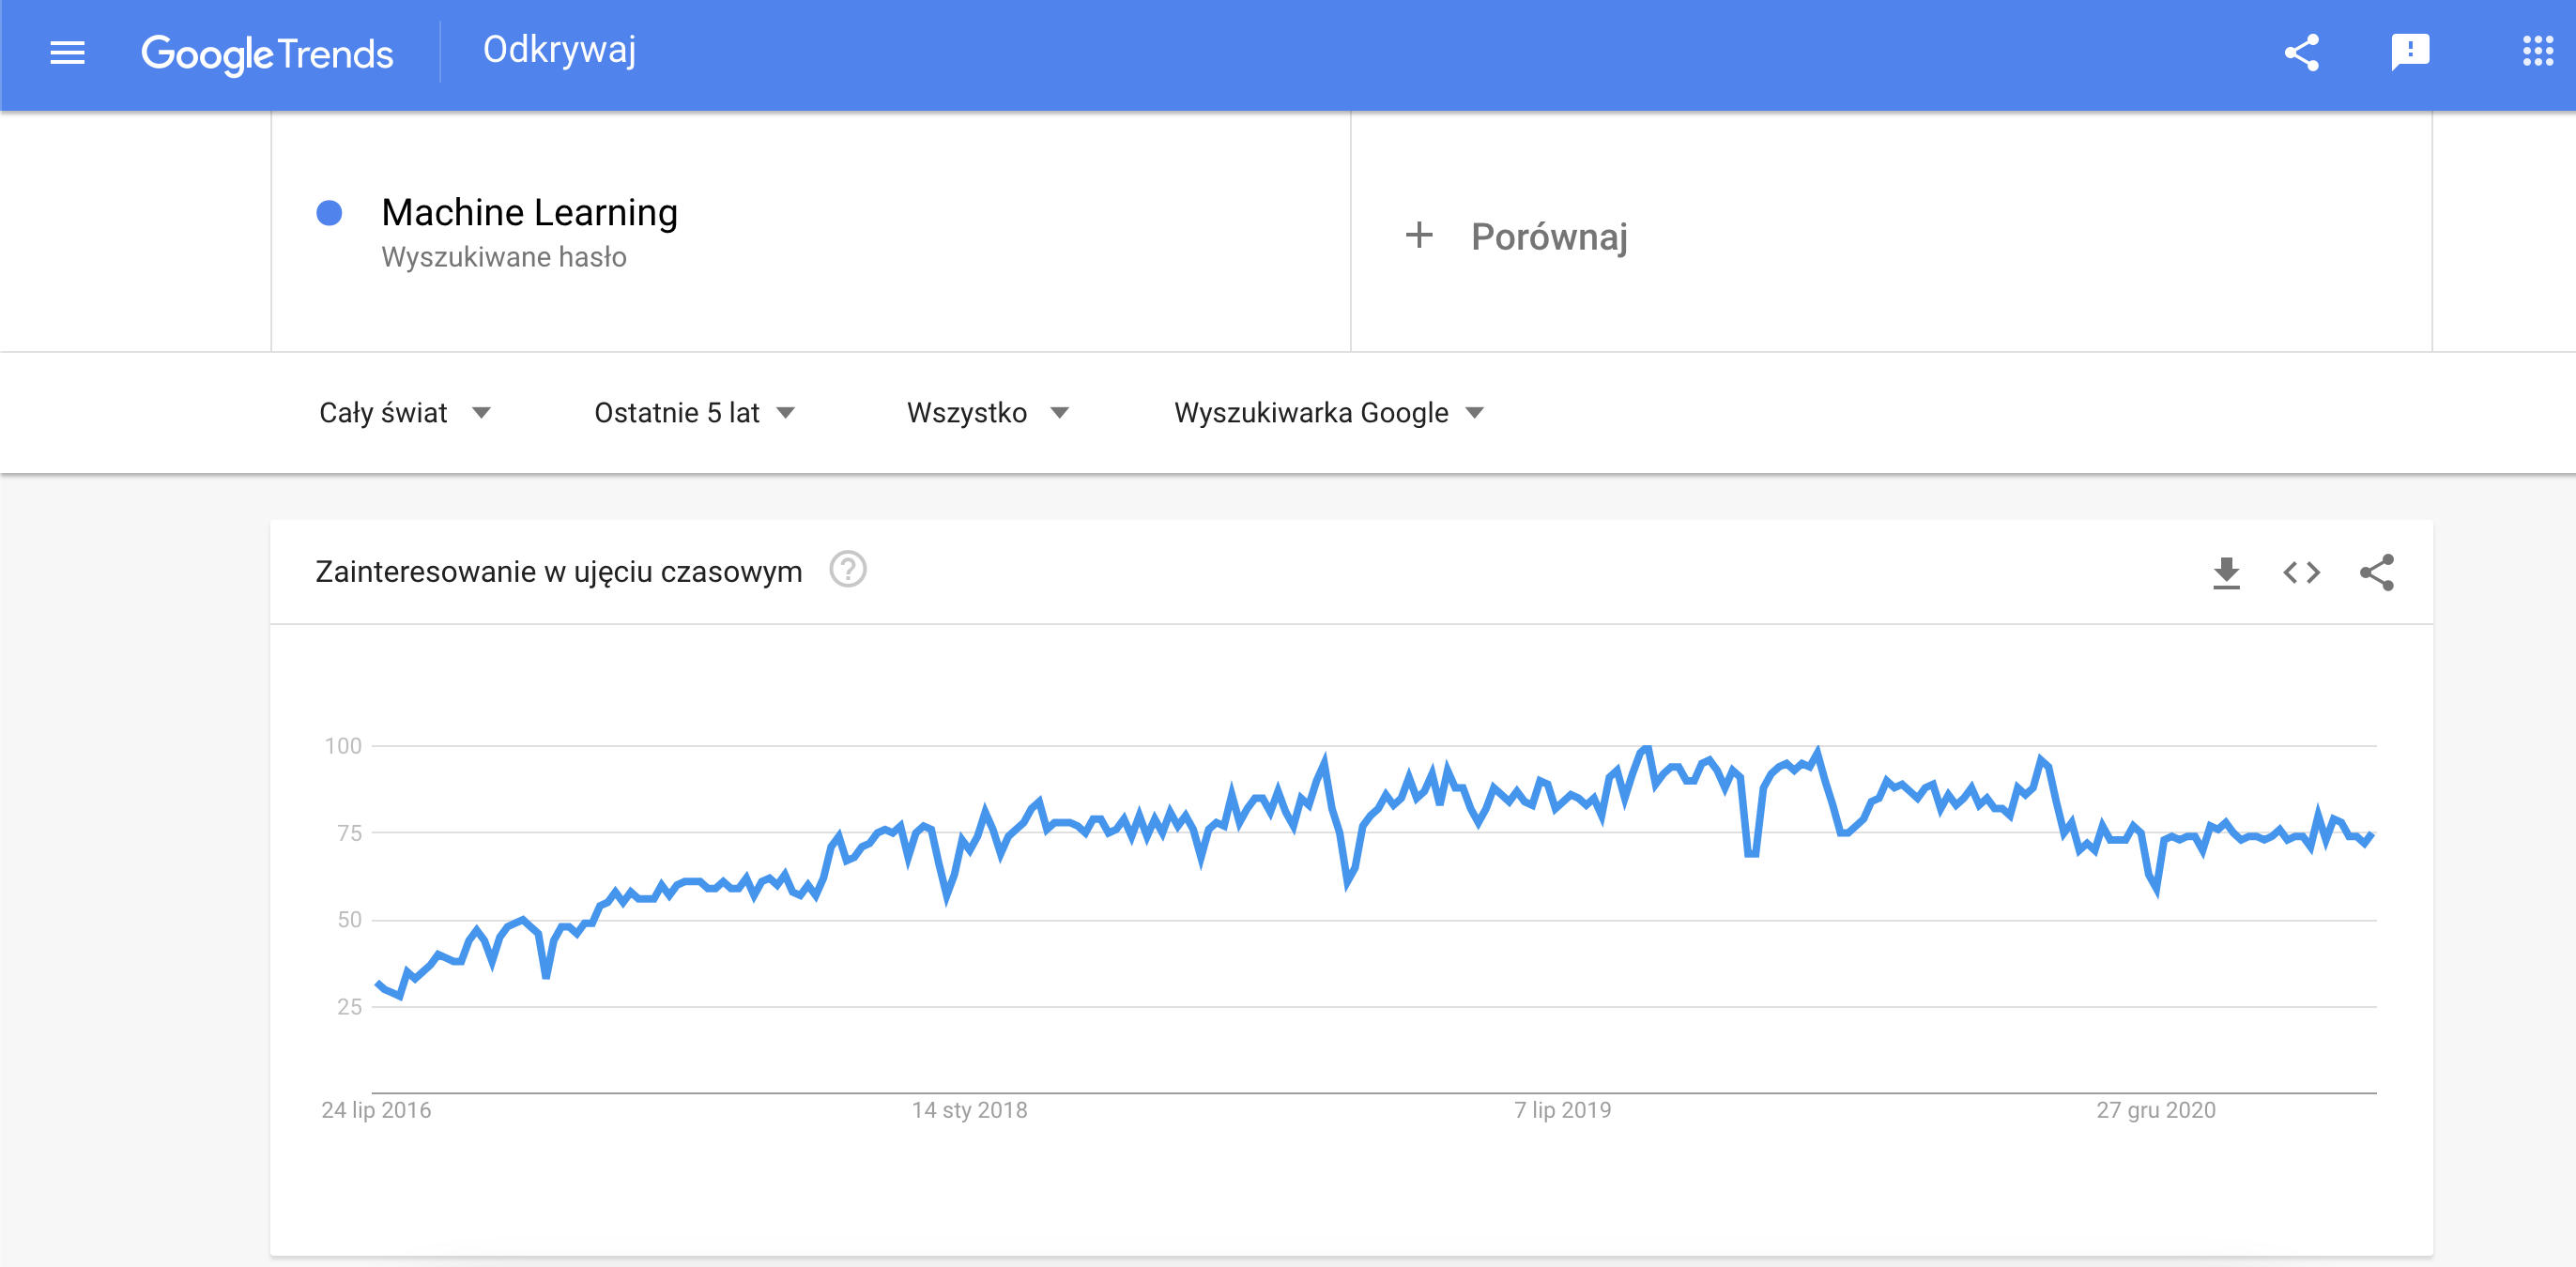

Zakładamy, że mamy pewne zjawisko opisane za pomocą funkcji sinus np. poziom naładowania baterii w telefonie. 
tzn. $p=sin(t)+\epsilon$.
Chcemy napisać program który na podstawie znajomości pewnego przebiegu czasowego od $t_1$ do $t_2$ będzie przewidywał poziom naładowania baterii dla pewnego $t_3$ który nie znajduje się w przedziale $(t_1,t_2)$ lub nie należy do zbioru czasów reprezentujących pomiary $\{t_a,t_b,t_c,...,t_K\}$.
Załóżmy, że zjawisko chcemy modelować wielomianem.
Tzn. $\hat{p}=\sum_{i=1}^{N} \beta_i \cdot t^i$.
Współczynniki $\beta_i$ dobieramy tak aby funkcja:
$Koszt=\sum_{j=0}^{K}(\hat{p}(t_j)-p(t_j))^2 $
była minimalna.



## I to już? 

In [14]:
import numpy as np
import sklearn 
import math
from matplotlib import pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel,RBF
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
np.random.seed(10)

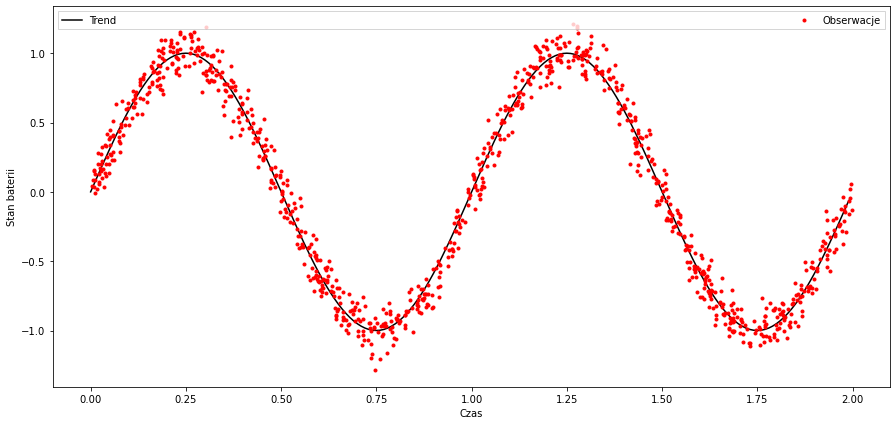

In [5]:
#X=np.array([i*0.01 for i in range(2000)])
X_noise=(2)*np.random.rand(1,1000)[0]
X=np.array([0.01*i for i in range(200)])
y=np.array([np.sin(2*math.pi*i) for i in X])
y_noise=np.array([np.sin(2*math.pi*i)+0.1*np.random.randn(1)[0] for i in X_noise])
plt.figure(figsize=(15,7))
plt.plot(np.sort(X),y[np.argsort(X)],'k',markersize=1,label='Trend')
plt.plot(np.sort(X_noise),y_noise[np.argsort(X_noise)],'ro',markersize=3,label='Obserwacje')
leg = plt.legend(loc='upper center', ncol=2, mode="expand", shadow=False, fancybox=False)
plt.xlabel('Czas')
plt.ylabel('Stan baterii')
plt.show()

Wielomian stopnia 1.
Wielkość błędu na zbiorze testowym 0.45176313992094735.
Wielkość błędu na zbiorze treningowym 0.4166421690150337.


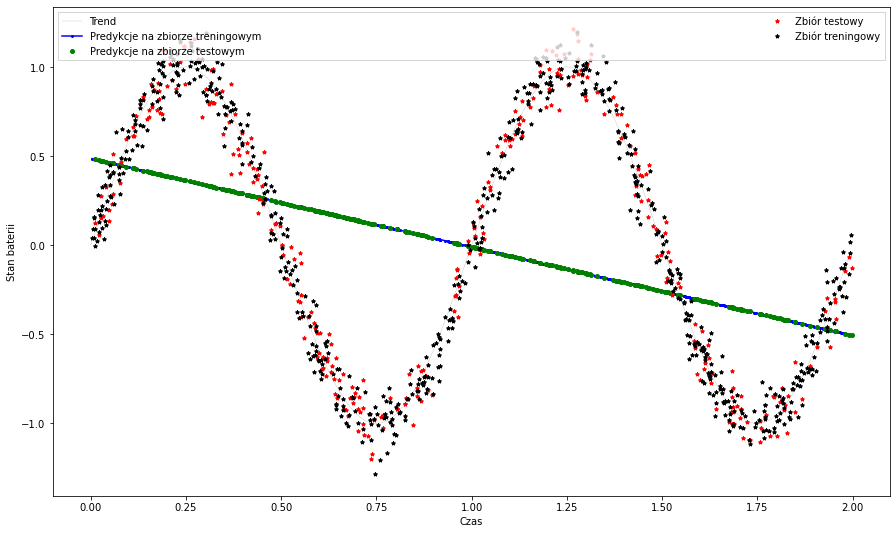


Wielomian stopnia 2.
Wielkość błędu na zbiorze testowym 0.4517886177203936.
Wielkość błędu na zbiorze treningowym 0.41662307603145515.


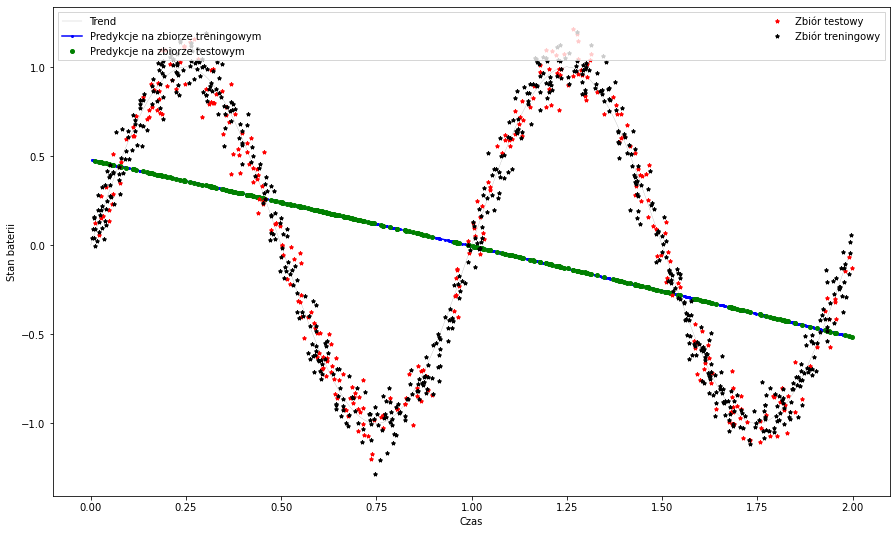


Wielomian stopnia 3.
Wielkość błędu na zbiorze testowym 0.36768539927482957.
Wielkość błędu na zbiorze treningowym 0.36919692084880096.


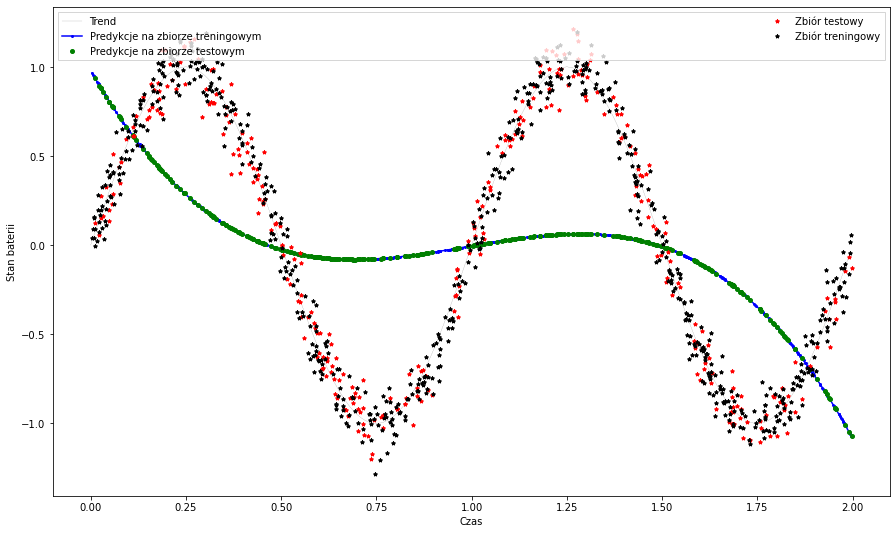


Wielomian stopnia 5.
Wielkość błędu na zbiorze testowym 0.055958677660740856.
Wielkość błędu na zbiorze treningowym 0.06170593805779728.


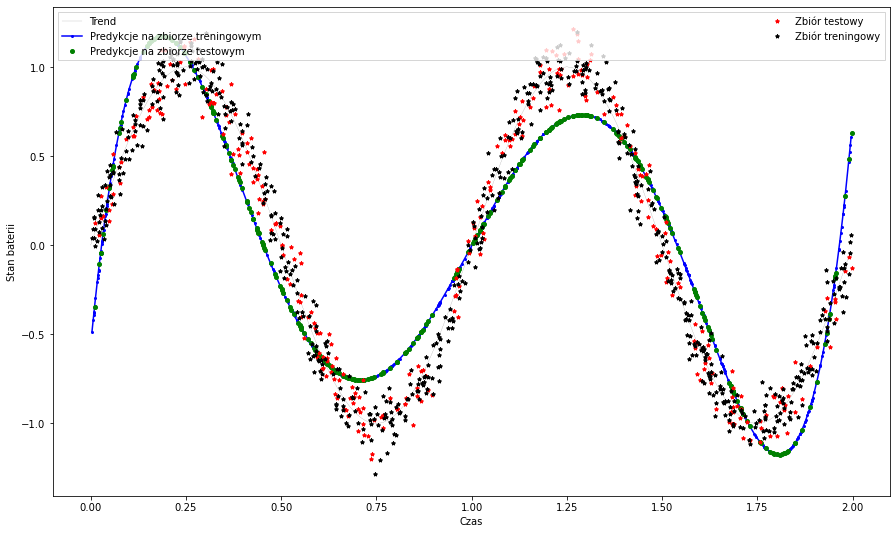


Wielomian stopnia 6.
Wielkość błędu na zbiorze testowym 0.05592030316932732.
Wielkość błędu na zbiorze treningowym 0.06170487911076466.


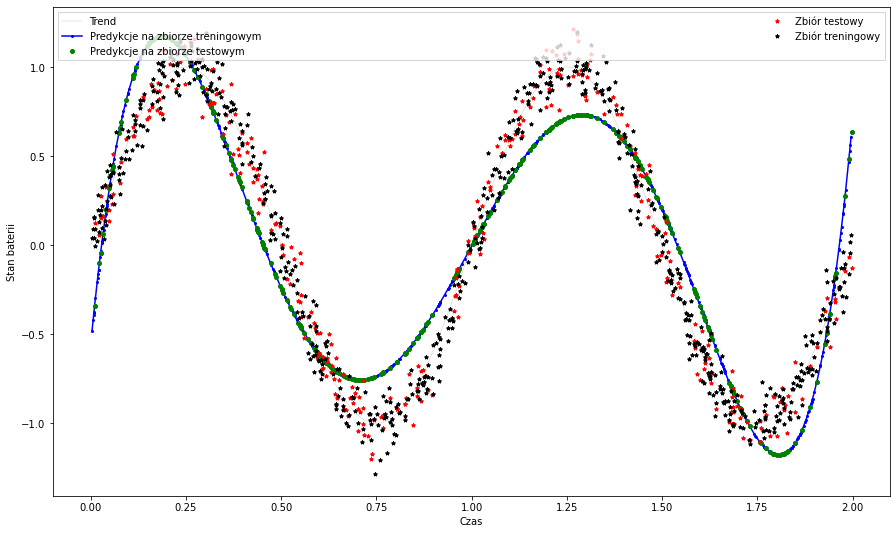


Wielomian stopnia 7.
Wielkość błędu na zbiorze testowym 0.012042539957792727.
Wielkość błędu na zbiorze treningowym 0.010751522184387201.


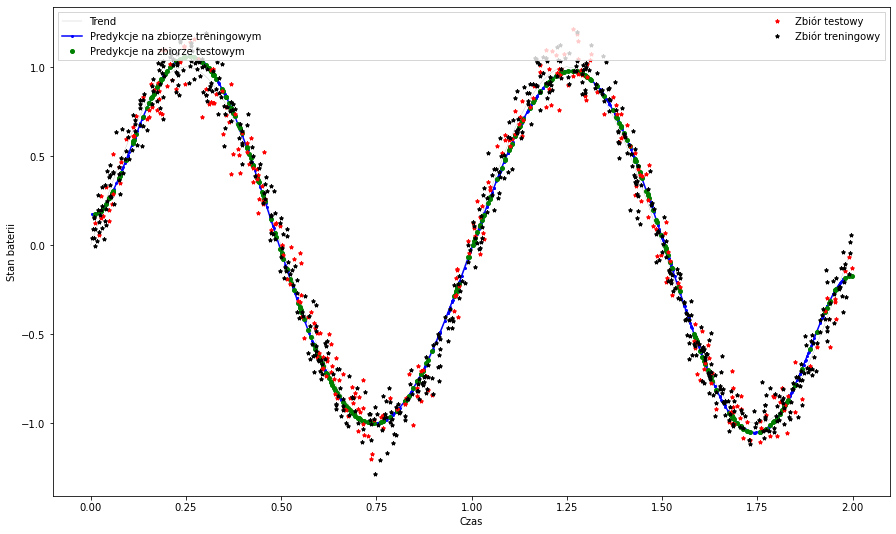


Wielomian stopnia 9.
Wielkość błędu na zbiorze testowym 0.010597763374373806.
Wielkość błędu na zbiorze treningowym 0.009156939568841053.


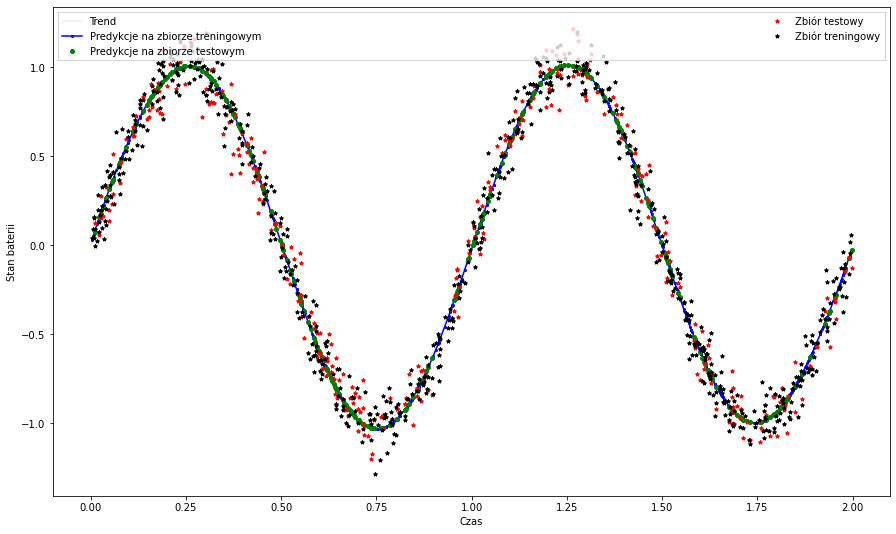


Wielomian stopnia 11.
Wielkość błędu na zbiorze testowym 0.01031208631390106.
Wielkość błędu na zbiorze treningowym 0.00907103769340416.


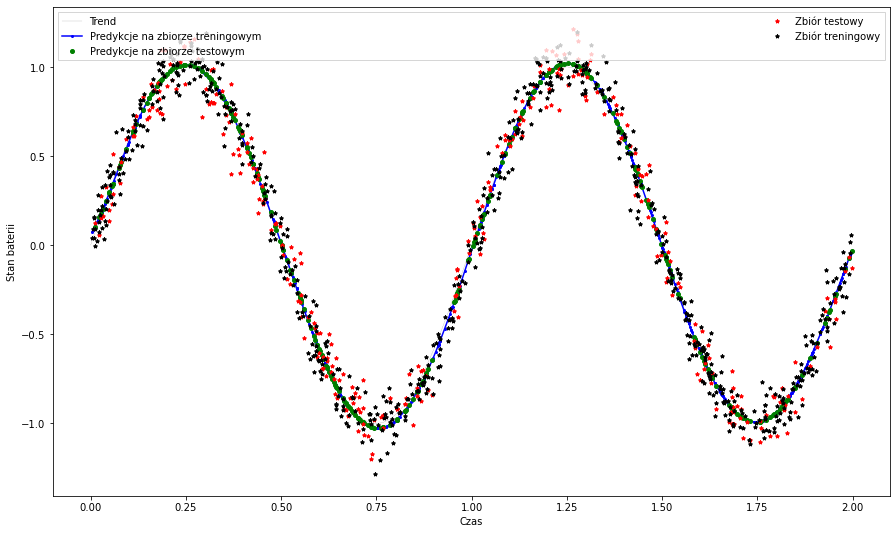


Wielomian stopnia 12.
Wielkość błędu na zbiorze testowym 0.010392946367176326.
Wielkość błędu na zbiorze treningowym 0.009040326767433415.


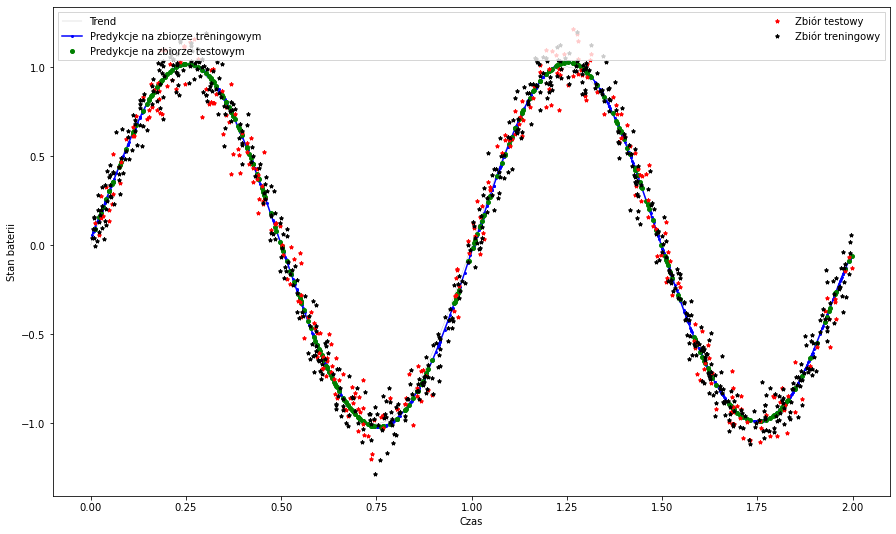


Wielomian stopnia 13.
Wielkość błędu na zbiorze testowym 0.010380687635424385.
Wielkość błędu na zbiorze treningowym 0.00903926652396674.


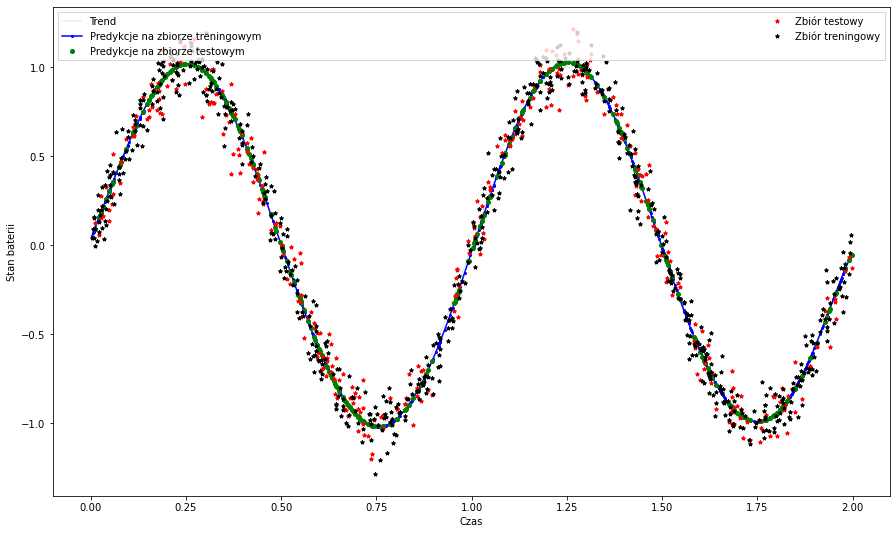


Wielomian stopnia 14.
Wielkość błędu na zbiorze testowym 0.010491256893973901.
Wielkość błędu na zbiorze treningowym 0.009023333123883674.


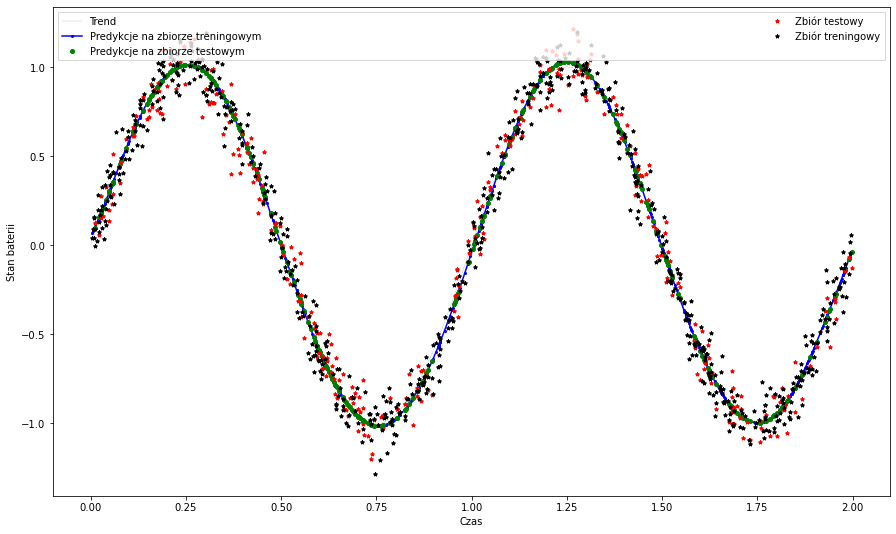


Wielomian stopnia 15.
Wielkość błędu na zbiorze testowym 0.010490618771697354.
Wielkość błędu na zbiorze treningowym 0.009022449217416179.


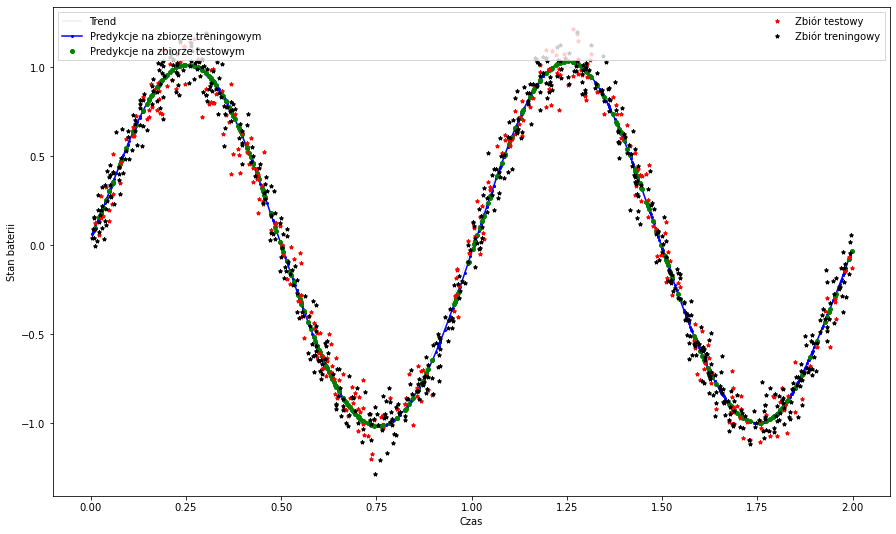


Wielomian stopnia 20.
Wielkość błędu na zbiorze testowym 0.010601128513046247.
Wielkość błędu na zbiorze treningowym 0.008966112203840778.


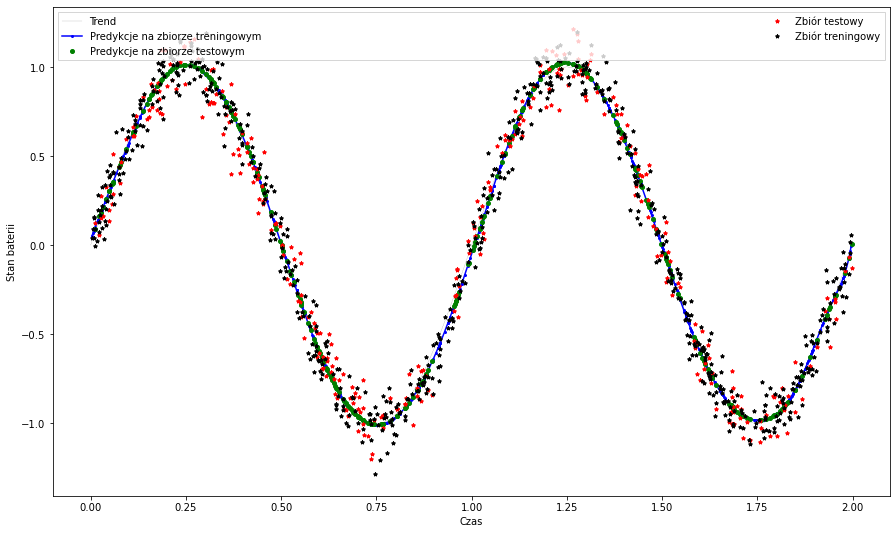

In [6]:
#podział na zbiór treningowy oraz testowy.
X_train, X_test, y_train, y_test = train_test_split(
    X_noise.reshape(-1,1), y_noise.reshape(-1,1), test_size=0.33, random_state=42)
#fitowanie wielomianów o różnym stopniu 
mse_pred=[]
mse_tr=[]
for degree in [1,2,3,5,6,7,9,11,12,13,14,15,20]:
    linear_regression = LinearRegression()
    model = make_pipeline(PolynomialFeatures(degree), linear_regression)
    
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    y_total=model.predict(X_train)
    print('Wielomian stopnia %s.' % degree)
    print('Wielkość błędu na zbiorze testowym %s.' % mean_squared_error(y_pred,y_test))
    print('Wielkość błędu na zbiorze treningowym %s.' % mean_squared_error(y_total,y_train))
    mse_pred.append(mean_squared_error(y_pred,y_test))
    mse_tr.append( mean_squared_error(y_total,y_train))
    plt.figure(figsize=(15,9))
    plt.plot(np.sort(X),y[np.argsort(X)],'k',linewidth=0.1,label='Trend')
    plt.plot(np.sort(X_train.flatten()),y_total[np.argsort(X_train.flatten())],'.b-',markersize=4,label='Predykcje na zbiorze treningowym')
    plt.plot(X_test,y_pred,'go',markersize=4,label='Predykcje na zbiorze testowym')
    plt.plot(X_test,y_test,'r*',markersize=4,label='Zbiór testowy')
    plt.plot(X_train,y_train,'k*',markersize=4,label='Zbiór treningowy')
    leg = plt.legend(loc='upper center', ncol=2, mode="expand", shadow=False, fancybox=False)
    plt.xlabel('Czas')
    plt.ylabel('Stan baterii')
    plt.show()
    print()

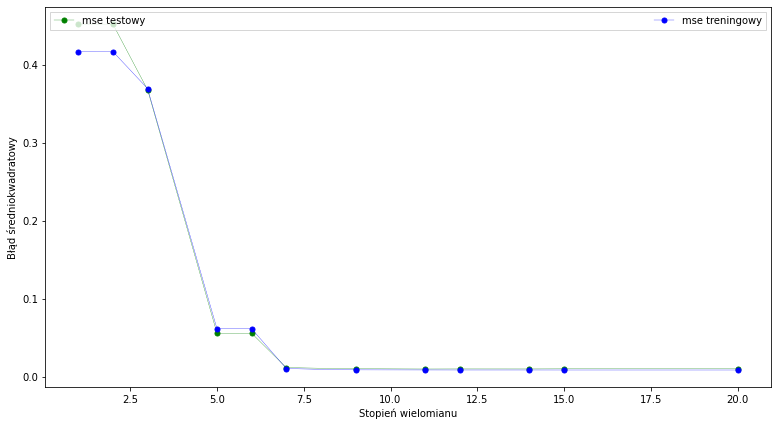

In [7]:
plt.figure(figsize=(13,7))
dg=[1,2,3,5,6,7,9,11,12,14,15,20]
plt.plot(dg,mse_pred[0:len(dg)],'-go',linewidth=0.3,markersize=5,label='mse testowy')
plt.plot(dg,mse_tr[0:len(dg)],'-bo',linewidth=0.3,markersize=5,label='mse treningowy')
leg = plt.legend(loc='upper center', ncol=2, mode="expand", shadow=False, fancybox=False)
plt.xlabel('Stopień wielomianu')
plt.ylabel('Błąd średniokwadratowy')
plt.show()

## Sprawdzimy teraz jak nasze modele generalizują się na nowe punktu spoza zakresu.

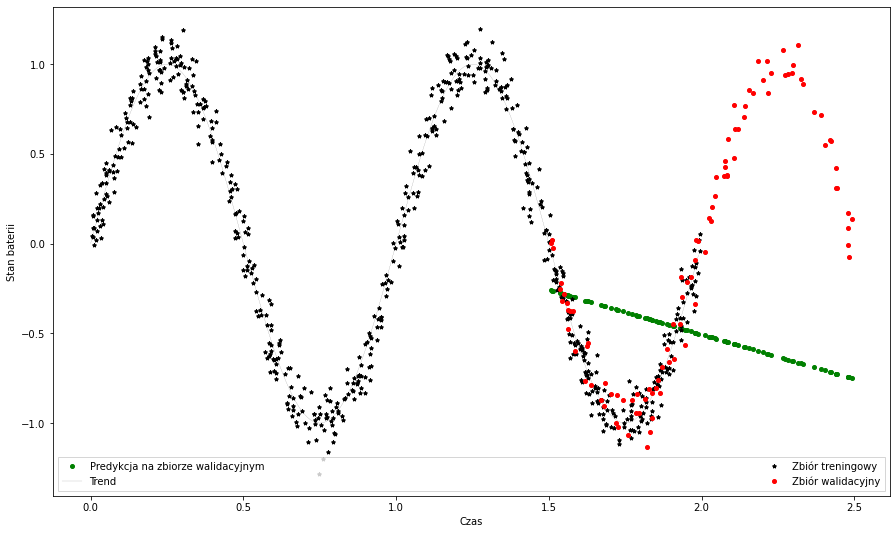

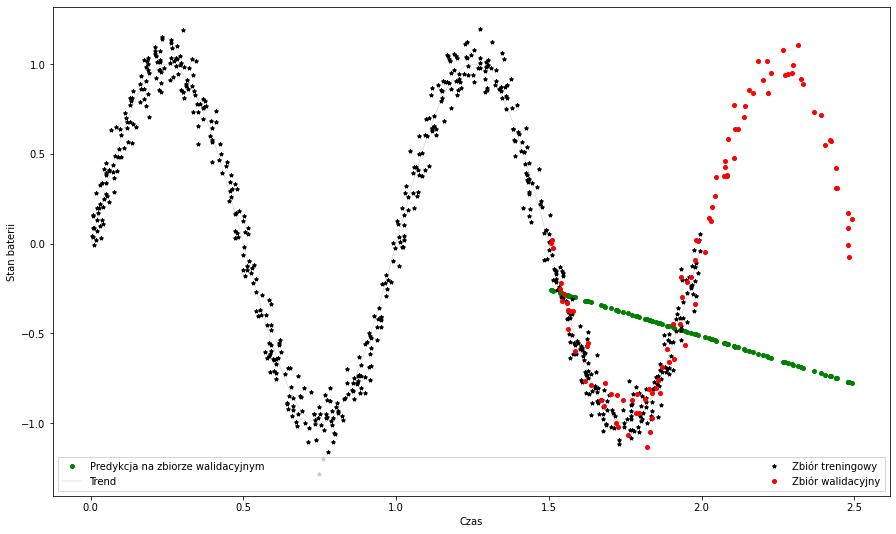

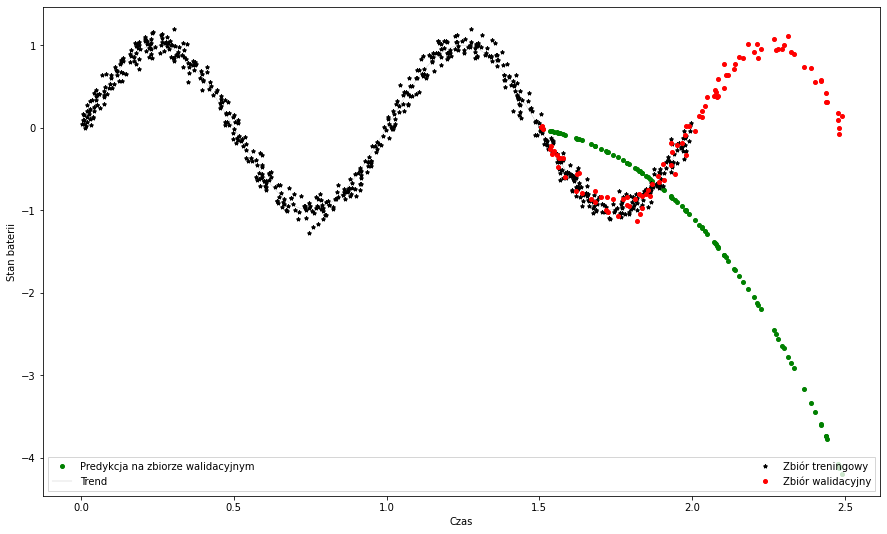

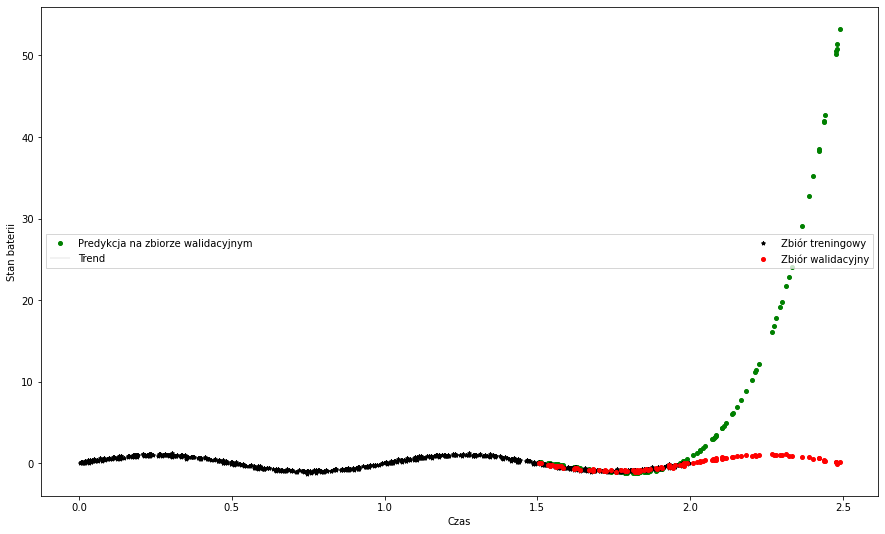

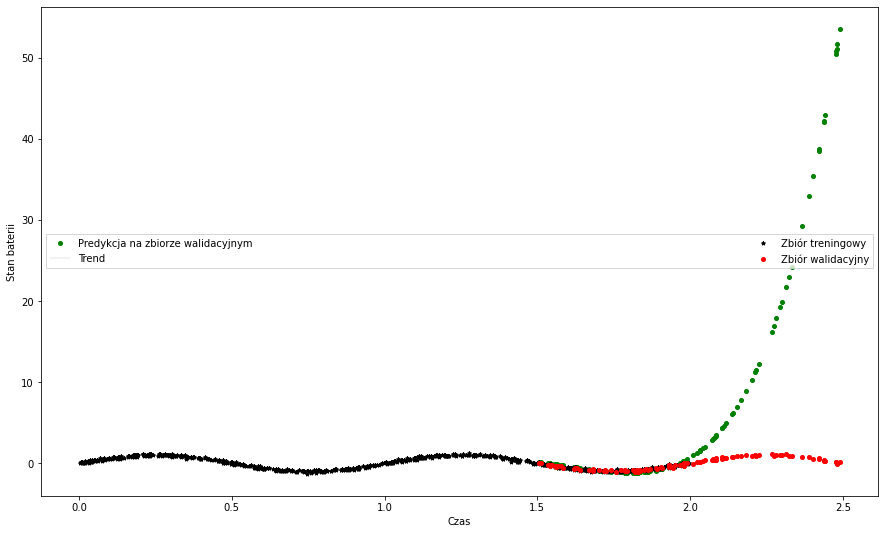

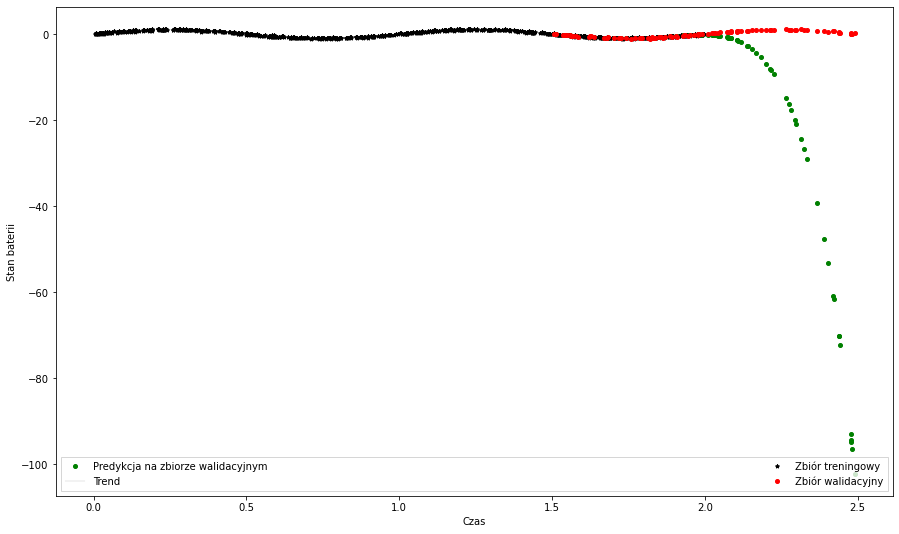

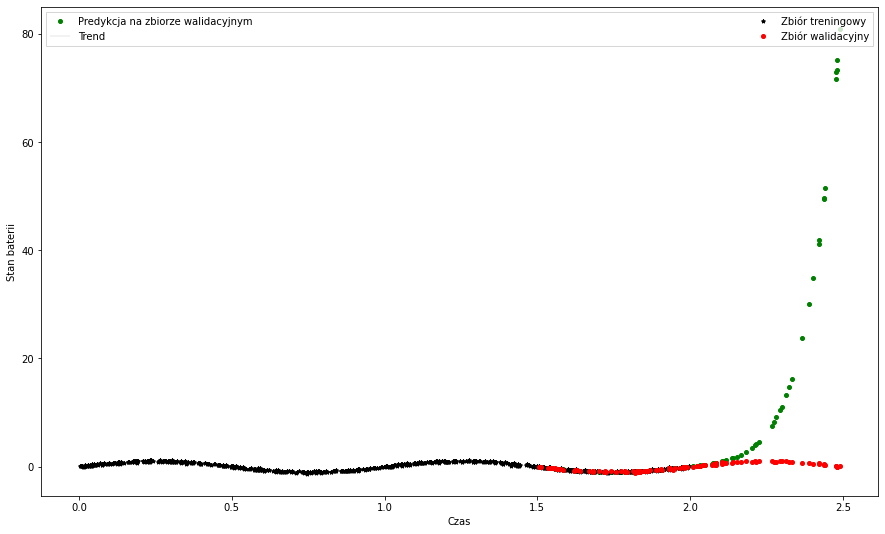

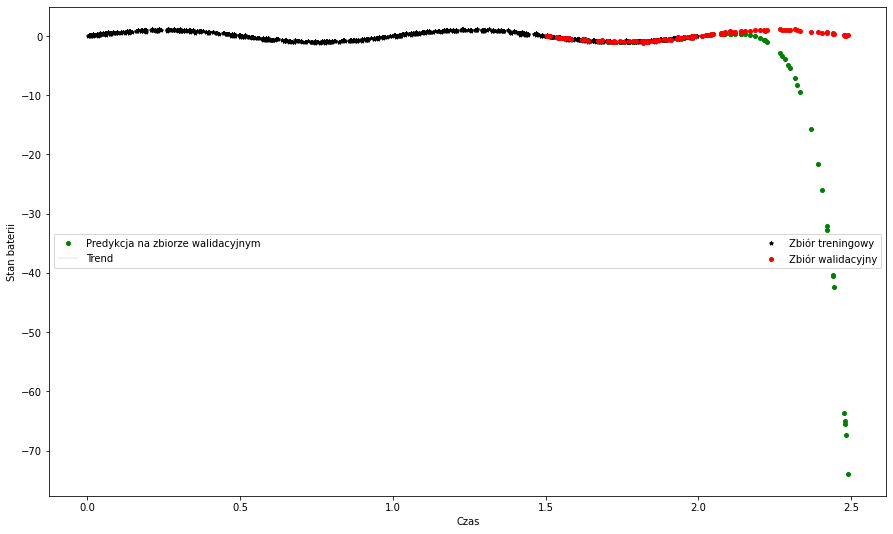

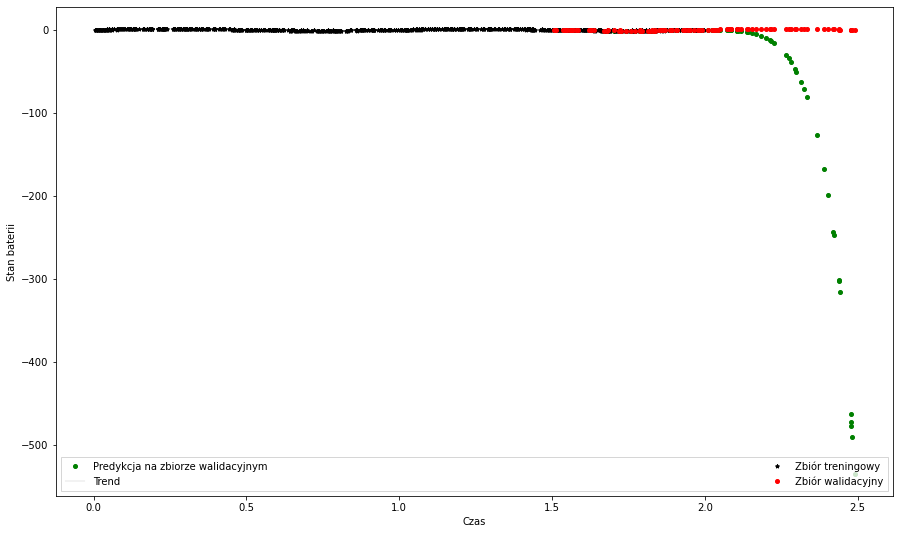

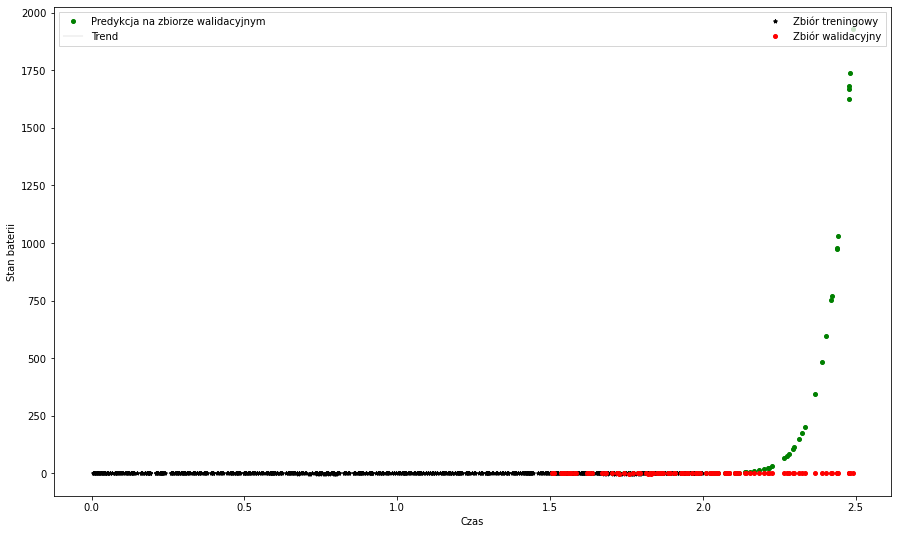

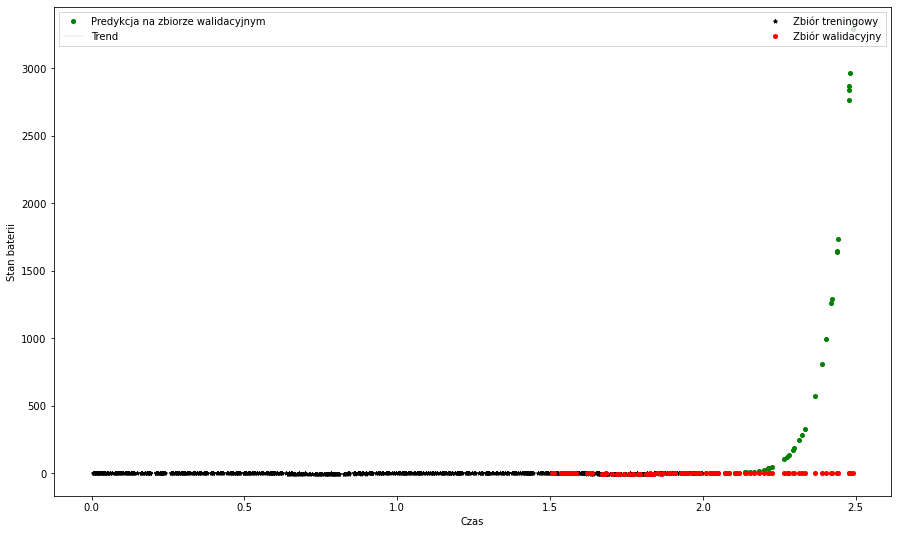

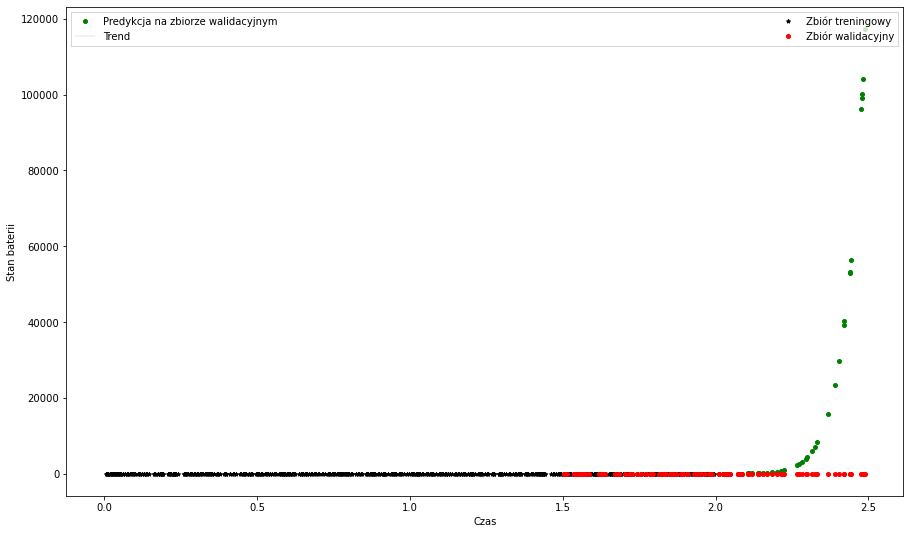

In [8]:
X_valid=(1.5+np.random.rand(1,100)[0]).reshape(-1,1)
y_valid=np.array([np.sin(2*math.pi*i)+0.1*np.random.randn(1)[0] for i in X_valid]).reshape(-1,1)
for degree in dg:
    linear_regression = LinearRegression()
    model = make_pipeline(PolynomialFeatures(degree), linear_regression)
    model.fit(X_train,y_train)
    y_v = model.predict(X_valid)
    y_total=model.predict(X_train)
    plt.figure(figsize=(15,9))
    plt.plot(X_valid,y_v,'go',markersize=4,label='Predykcja na zbiorze walidacyjnym')
    plt.plot(np.sort(X),y[np.argsort(X)],'k',linewidth=0.1,label='Trend')
    plt.plot(X_train,y_train,'k*',markersize=4,label='Zbiór treningowy')
    plt.plot(X_valid,y_valid,'ro',markersize=4,label='Zbiór walidacyjny')
    leg = plt.legend(loc='best', ncol=2, mode="expand", shadow=False, fancybox=False)
    plt.xlabel('Czas')
    plt.ylabel('Stan baterii')
    

## Przykład udanego uczenia modelu.

In [12]:
kernel = 5.1*DotProduct() + RBF(1)+WhiteKernel()
gpr = GaussianProcessRegressor(kernel=kernel).fit(X_train,y_train)

#gpr = make_pipeline(PolynomialFeatures(7), linear_regression).fit(X_train,y_train)

y_pred = gpr.predict(X_test).flatten()
y_total=gpr.predict(X_train).flatten()
y_v = gpr.predict(X_valid)
print('Wielkość błędu na zbiorze testowym %s.' % mean_squared_error(y_pred,y_test))
print('Wielkość błędu na zbiorze treningowym %s.' % mean_squared_error(y_total,y_train))

Wielkość błędu na zbiorze testowym 0.010443316396709201.
Wielkość błędu na zbiorze treningowym 0.009031476350949617.


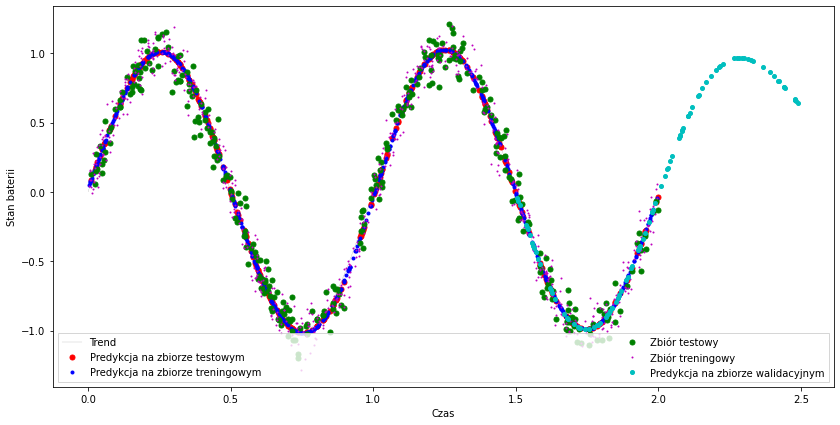

In [13]:
plt.figure(figsize=(14,7))
plt.plot(np.sort(X),y[np.argsort(X)],'k',linewidth=0.1,label='Trend')
plt.plot(X_test,y_pred,'ro',markersize=5,label='Predykcja na zbiorze testowym')
plt.plot(X_train,y_total,'bo',markersize=3,label='Predykcja na zbiorze treningowym')
plt.plot(X_test,y_test,'go',markersize=5,label='Zbiór testowy')
plt.plot(np.sort(X_train.flatten()),y_train[np.argsort(X_train.flatten())].flatten(),'mo',markersize=1,label='Zbiór treningowy')   
plt.plot(X_valid,y_v,'co',markersize=4,label='Predykcja na zbiorze walidacyjnym')
leg = plt.legend(loc='best', ncol=2, mode="expand", shadow=False, fancybox=False)
plt.xlabel('Czas')
plt.ylabel('Stan baterii')
plt.show()

## Przykład klasyfikacji.

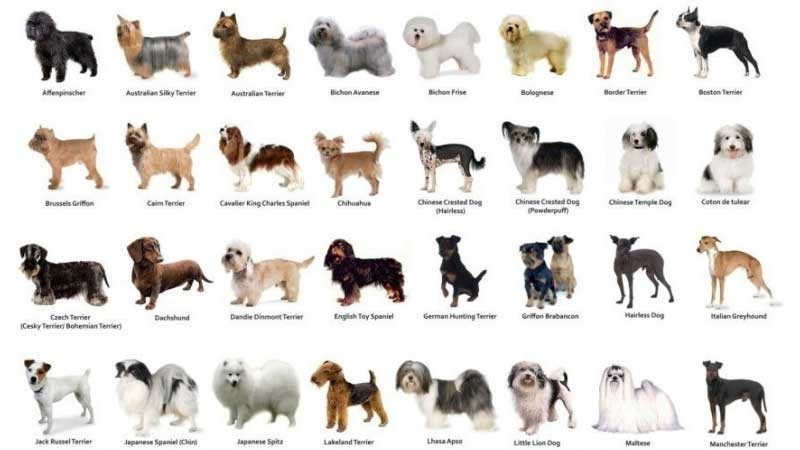

In [13]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle 
from sklearn.metrics import accuracy_score


In [15]:
df=pd.read_csv('weight-height.csv')
df

Gender     Height      Weight
0       Male  73.847017  241.893563
1       Male  68.781904  162.310473
2       Male  74.110105  212.740856
3       Male  71.730978  220.042470
4       Male  69.881796  206.349801
...      ...        ...         ...
9995  Female  66.172652  136.777454
9996  Female  67.067155  170.867906
9997  Female  63.867992  128.475319
9998  Female  69.034243  163.852461
9999  Female  61.944246  113.649103

[10000 rows x 3 columns]

## Kodowanie i skalowanie

In [16]:
df['Weight']=df['Weight']*0.453
df['Height']=df['Height']*2.54
df['Gender']=np.where(df['Gender']=='Female',1,0)
df=shuffle(df)
df

Gender      Height     Weight
937        0  173.536490  93.511045
9355       1  164.222984  67.479928
2293       0  188.047878  98.670556
192        0  177.111164  92.364732
8675       1  164.033023  57.699624
...      ...         ...        ...
9372       1  162.762175  55.720101
7291       1  167.778361  65.748185
1344       0  172.085838  81.139495
7293       1  167.175621  69.463723
1289       0  174.964640  82.224938

[10000 rows x 3 columns]

## Trenujemy!

In [17]:
y=df['Gender'].values
X=df[['Height','Weight']].values
X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.33, random_state=42)

In [18]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs').fit(X_train, y_train)
y_pred=clf.predict(X_test)
proba=clf.predict_proba(X_test)
print('Accuracy %s' % round(accuracy_score(y_pred,y_test),2))

Accuracy 0.91


In [19]:
Test=np.array([[181,88]])
print(clf.predict(Test))
print(clf.predict_proba(Test))

[0]
[[0.98580758 0.01419242]]


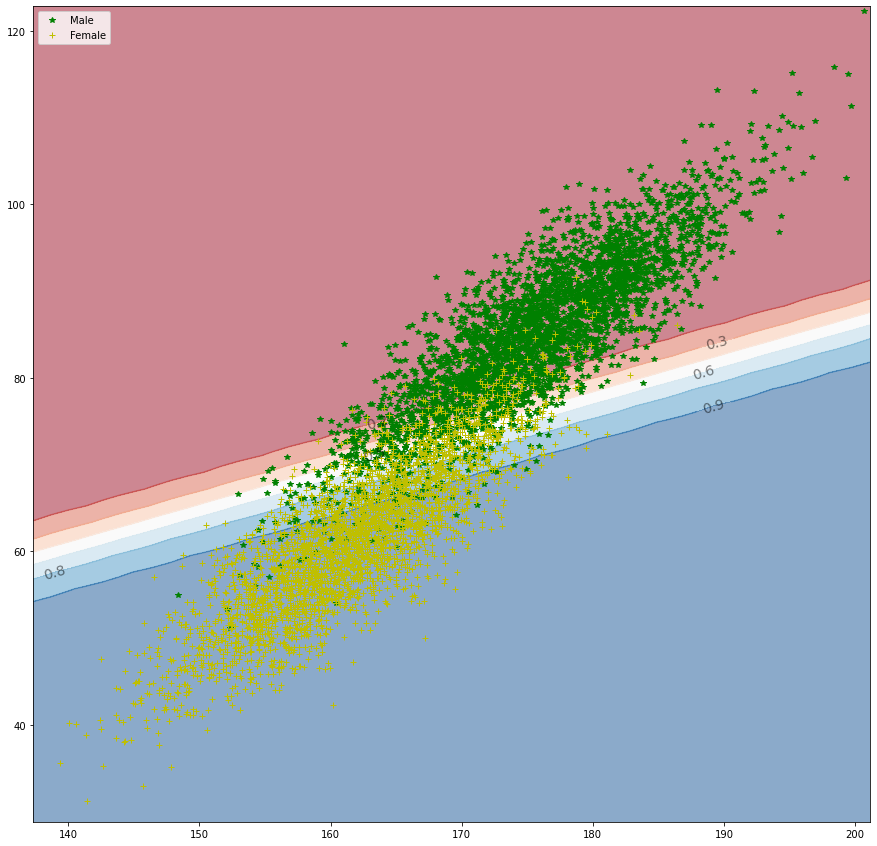

In [29]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
plt.figure(1, figsize=(15,15))
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50),
                     np.linspace(y_min, y_max, 50))
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
ax = plt.gca()
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)
cs = ax.contourf(xx, yy, Z, cmap='RdBu', alpha=.5)
cs2 = ax.contour(xx, yy, Z, cmap='RdBu', alpha=.5)
plt.clabel(cs2, fmt = '%2.1f', colors = 'k', fontsize=14)
ax.plot(X_train[y_train == 0, 0], X_train[y_train == 0, 1], 'g*', label='Male')
ax.plot(X_train[y_train == 1, 0], X_train[y_train == 1, 1], 'y+', label='Female')
# make legend
plt.legend(loc='upper left', scatterpoints=1, numpoints=1)

## Hands on experience: Uczenie przez rozróżnienie wzorców.

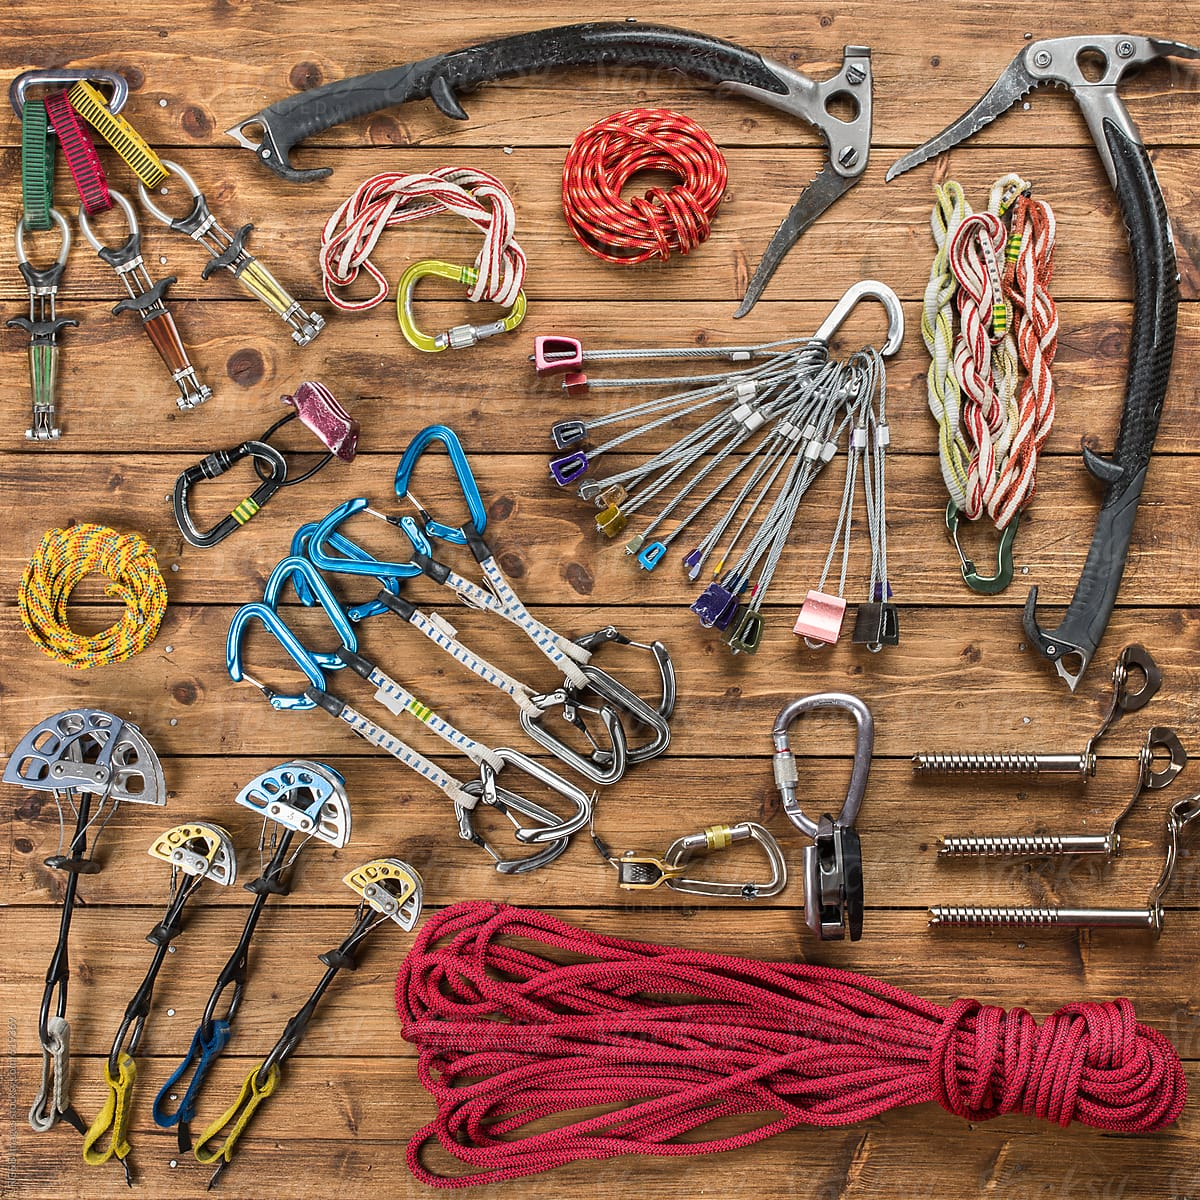

## Rzut oka na dane

In [98]:
import pandas as pd

#####################################################################################
df=pd.read_csv('Mall_Customers.csv')
df=df.drop(['CustomerID'],axis=1)
df['Gender']=np.where(df['Gender']=='Female',1,0)

print(df[:10])


   Gender  Age  Annual Income (k$)  Spending Score (1-100)
0       0   19                  15                      39
1       0   21                  15                      81
2       1   20                  16                       6
3       1   23                  16                      77
4       1   31                  17                      40
5       1   22                  17                      76
6       1   35                  18                       6
7       1   23                  18                      94
8       0   64                  19                       3
9       1   30                  19                      72


## Klastrujemy

[[ 0.56 38.85 60.56 50.2 ]]


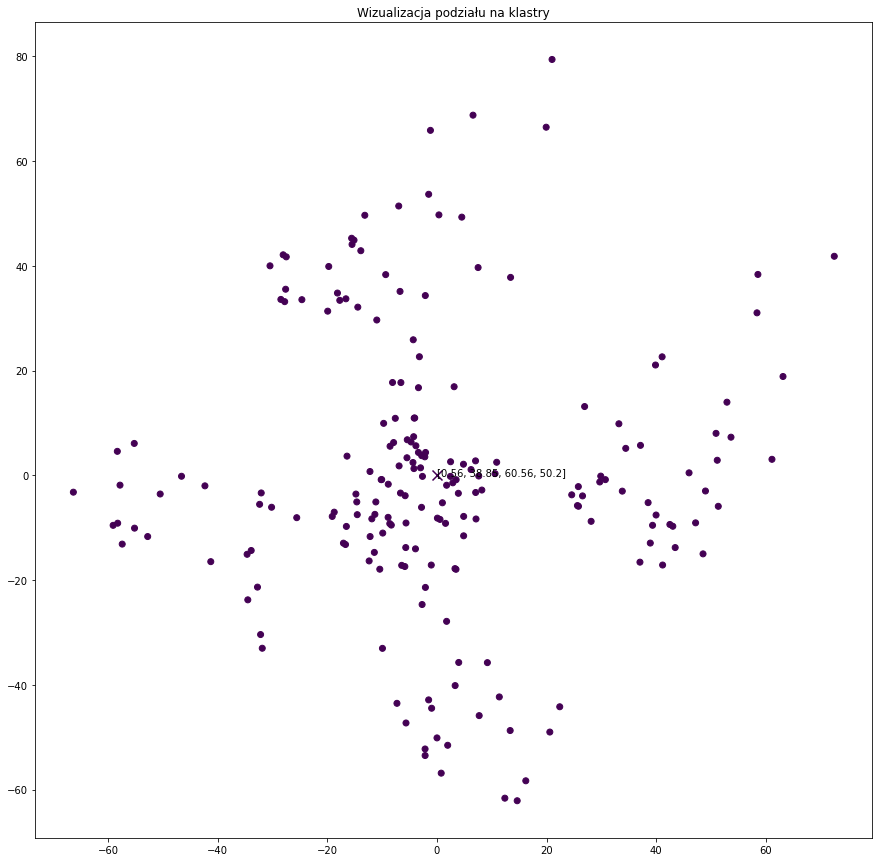

In [126]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

kmeans = KMeans(n_clusters=1, random_state=0)
y_pred=kmeans.fit_predict(df)
centers=kmeans.cluster_centers_

pca = PCA(n_components=2).fit(df)
X_pca=pca.transform(df)


plt.figure(figsize=(15,15))
plt.scatter(X_pca[:,0], X_pca[:,1],c=y_pred)
plt.title('Wizualizacja podziału na klastry')
centers_flat=pca.transform(kmeans.cluster_centers_)

plt.scatter(centers_flat[:,0],centers_flat[:,1],c=list(set(kmeans.labels_)),marker='x',s=[100 for s in centers_flat])
print(centers)
for i, txt in enumerate(centers):
    plt.annotate(str([round(s,2) for s in txt]), (centers_flat[:,0][i], centers_flat[:,1][i]))

## Uczenie przez oddziaływanie ze środowiskiem.

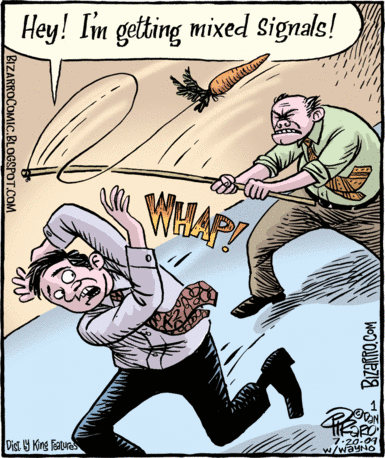

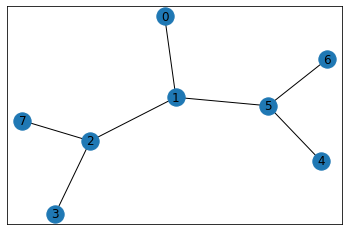

In [20]:
import numpy as np
import pylab as plt

points_list = [(0,1), (1,5), (5,6), (5,4), (1,2), (2,3), (2,7)]
goal = 7

import networkx as nx
G=nx.Graph()
G.add_edges_from(points_list)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos)
plt.show()

Zadanie polega na znalezieniu najkrótszej scieżki z wierzchołka 0 do wierzchołka 7.

## Definiujemy macierz kar i nagród

In [21]:
MATRIX_SIZE = 8

# create matrix x*y
R = np.matrix(np.ones(shape=(MATRIX_SIZE, MATRIX_SIZE)))
R *= -1

# assign zeros to paths and 100 to goal-reaching point
for point in points_list:
    #print(point)
    if point[1] == goal:
        R[point] = 100
    else:
        R[point] = 0

    if point[0] == goal:
        R[point[::-1]] = 100
    else:
        # reverse of point
        R[point[::-1]]= 0

# add goal point round trip
R[goal,goal]= 100
print(R)

[[ -1.   0.  -1.  -1.  -1.  -1.  -1.  -1.]
 [  0.  -1.   0.  -1.  -1.   0.  -1.  -1.]
 [ -1.   0.  -1.   0.  -1.  -1.  -1. 100.]
 [ -1.  -1.   0.  -1.  -1.  -1.  -1.  -1.]
 [ -1.  -1.  -1.  -1.  -1.   0.  -1.  -1.]
 [ -1.   0.  -1.  -1.   0.  -1.   0.  -1.]
 [ -1.  -1.  -1.  -1.  -1.   0.  -1.  -1.]
 [ -1.  -1.   0.  -1.  -1.  -1.  -1. 100.]]


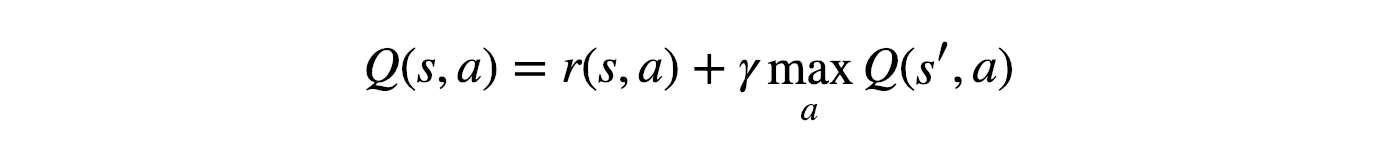

## Definiujemy macierz "postępów w nauce"

In [117]:
Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))

# learning parameter
gamma = 0.8

initial_state = 1

def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act

available_act = available_actions(initial_state) 

def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act,1))
    return next_action

action = sample_next_action(available_act)

def update(current_state, action, gamma,i):
    
  max_index = np.where(Q[action,] == np.max(Q[action,]))[1]
  
  if max_index.shape[0] > 1:
      max_index = int(np.random.choice(max_index, size = 1))
  else:
      max_index = int(max_index)
  max_value = Q[action, max_index]
  
  Q[current_state, action] = R[current_state, action] + gamma * max_value
  if i%50==0:
      print('max_value', R[current_state, action] + gamma * max_value)
  
  if (np.max(Q) > 0):
    return(np.sum(Q/np.max(Q)*100))
  else:
    return (0)
    
update(initial_state, action, gamma,0)

max_value 0.0


0

max_value 0.0
##############################
Score: 0
max_value 64.0
##############################
Score: 545.7838850718301
max_value 195.15392000000003
##############################
Score: 631.290973049142
max_value 153.66304563200003
##############################
Score: 903.1456105142125
max_value 192.07880704000004
##############################
Score: 960.8337288809014
max_value 215.09043650560008
##############################
Score: 938.9975967822719
max_value 172.07234920448008
##############################
Score: 914.1607145117769
max_value 229.8178793635841
##############################
Score: 943.3674416700298
max_value 313.13651416788747
##############################
Score: 980.7280458068587
max_value 251.60736906744802
##############################
Score: 979.0918495075666
Trained Q matrix:
[[  0.          63.88675272   0.           0.           0.
    0.           0.           0.        ]
 [ 51.10940218   0.          80.           0.           0.
   50.67764693   0.

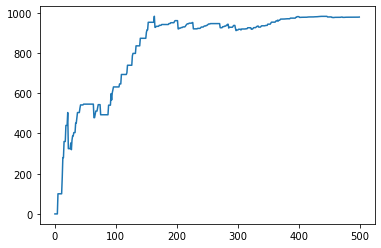

In [118]:
# Training
scores = []
for i in range(500):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma,i)
    scores.append(score)
    if i%50==0:
        print('#'*30)
        print ('Score:', str(score))
    
print("Trained Q matrix:")
print(Q/np.max(Q)*100)

# Testing
current_state = 0
steps = [current_state]

while current_state != 7:

    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]
    
    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)
    
    steps.append(next_step_index)
    current_state = next_step_index

print("Most efficient path:")
print(steps)

plt.plot(scores)
plt.show()


![tlt](fun.jpg)

# Dziękuje za uwagę ! 